In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

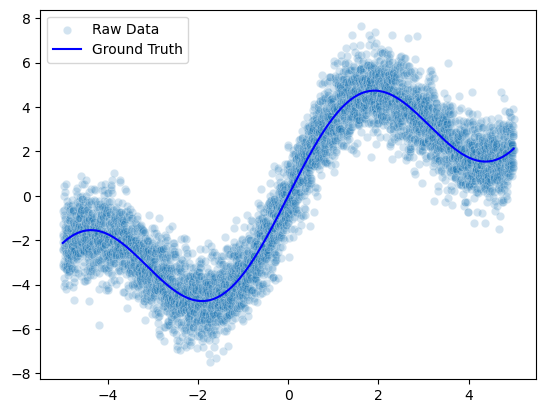

In [8]:
# Simulate data
sample_size = 5000
x = np.linspace(-5, 5, sample_size)
ground_truth = 3*np.sin(x) + x
noise = np.random.normal(0, 1.0, sample_size)
y = ground_truth + noise

# Scatter plot of raw data and ground truth function
sns.scatterplot(x=x, y=y, label='Raw Data', alpha=0.2)
sns.lineplot(x=x, y=ground_truth, color='blue', label='Ground Truth')

In [9]:
# Construct a PyTorch model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 64)
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)



Epoch: 1, Loss: 1.0135794878005981


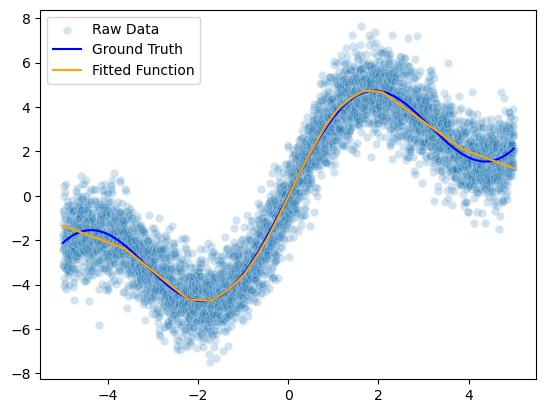

Epoch: 11, Loss: 1.0115827322006226


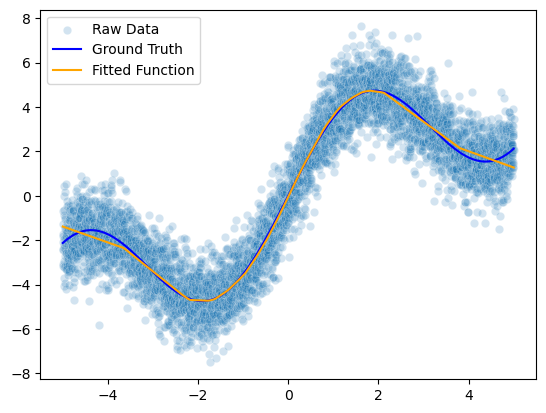

Epoch: 21, Loss: 1.0096193552017212


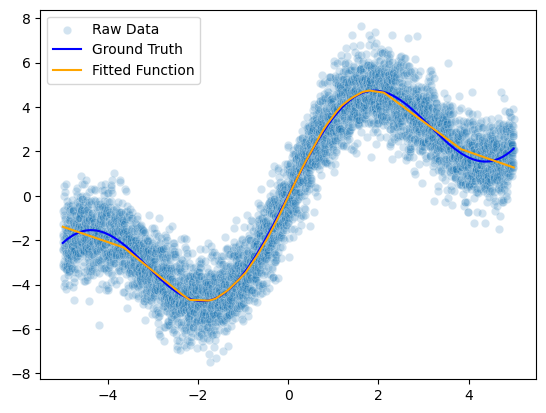

Epoch: 31, Loss: 1.0077893733978271


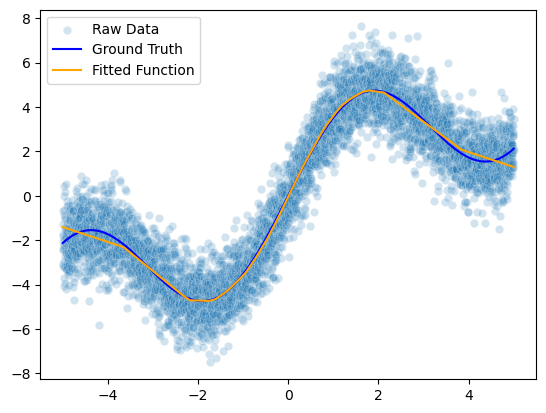

Epoch: 41, Loss: 1.0060057640075684


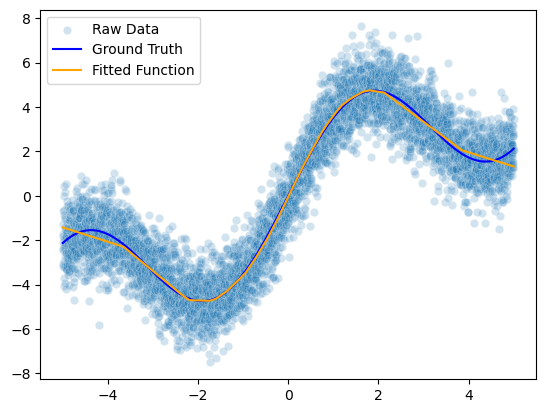

Epoch: 51, Loss: 1.0042680501937866


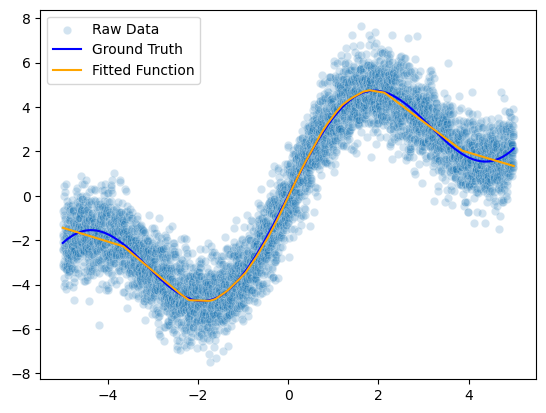

Epoch: 61, Loss: 1.0025875568389893


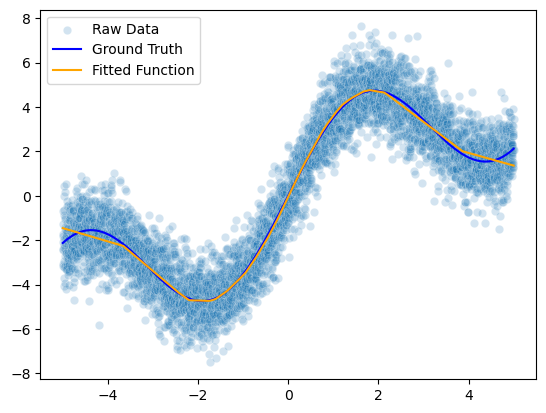

Epoch: 71, Loss: 1.0009841918945312


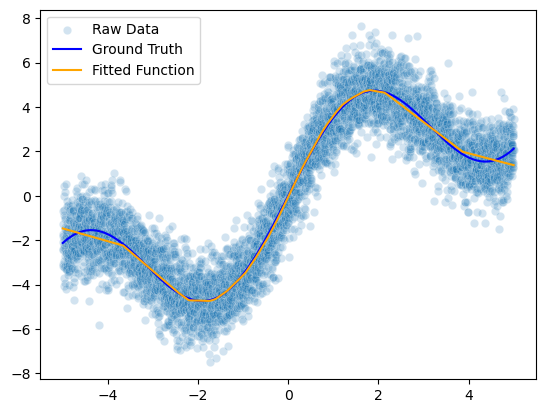

Epoch: 81, Loss: 1.006085991859436


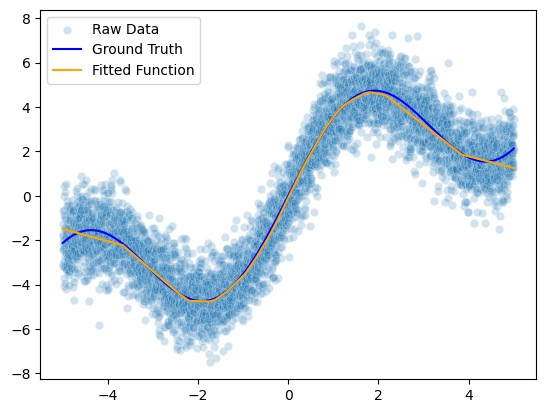

Epoch: 91, Loss: 0.9981346726417542


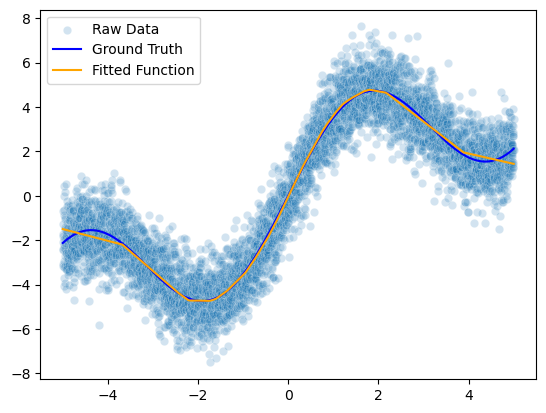

Epoch: 101, Loss: 0.997740626335144


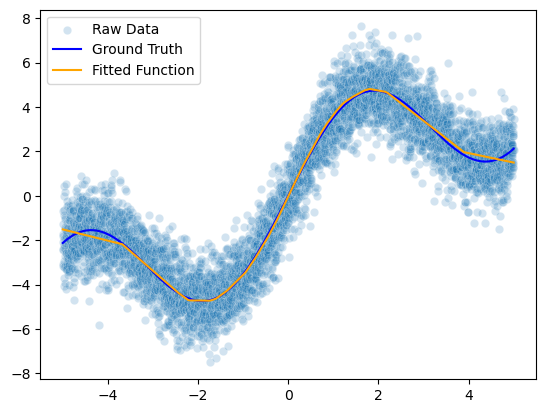

Epoch: 111, Loss: 0.9955301880836487


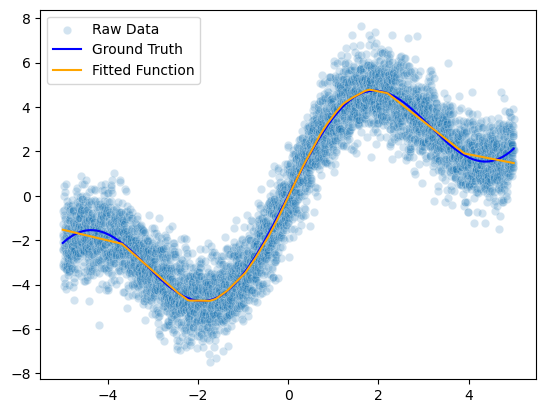

Epoch: 121, Loss: 0.9943026304244995


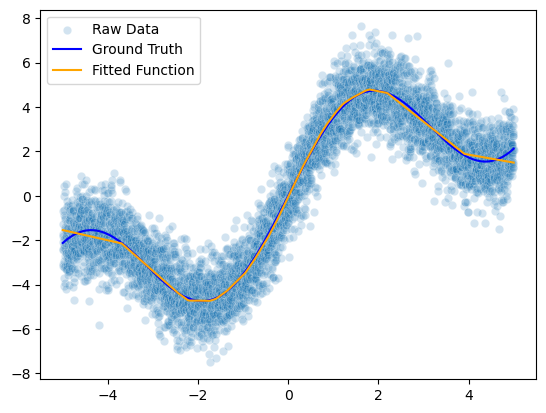

Epoch: 131, Loss: 0.9931525588035583


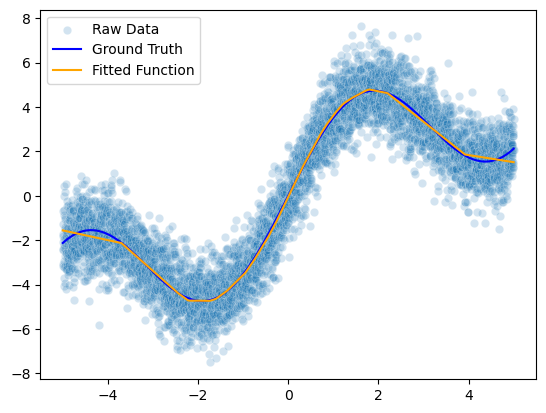

Epoch: 141, Loss: 0.9922308325767517


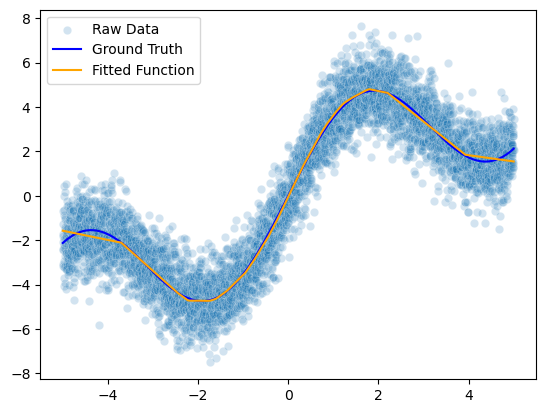

Epoch: 151, Loss: 0.9979760646820068


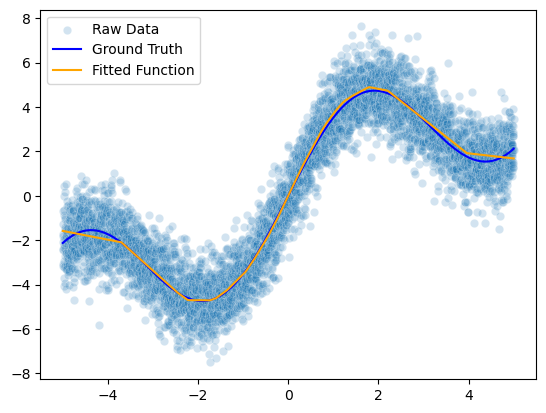

Epoch: 161, Loss: 0.992041289806366


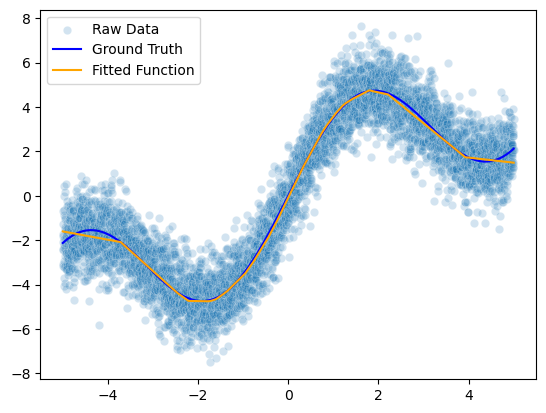

Epoch: 171, Loss: 0.9908130764961243


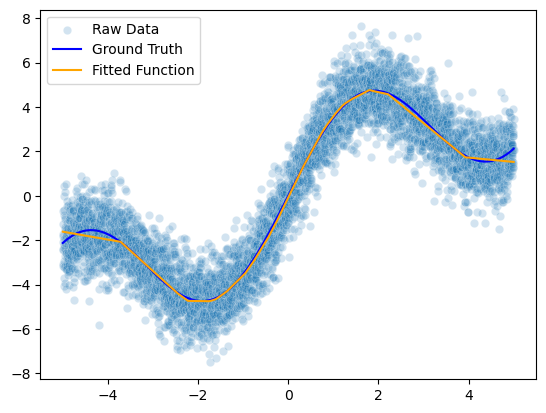

Epoch: 181, Loss: 0.9894929528236389


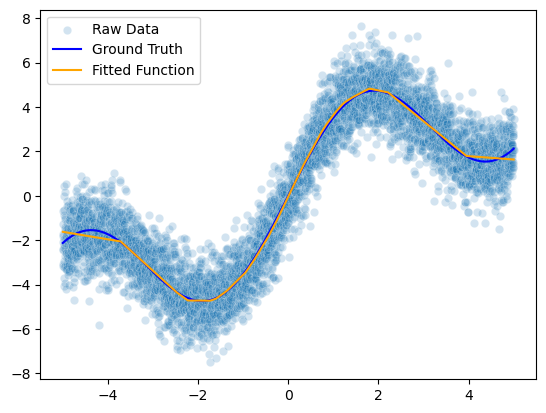

Epoch: 191, Loss: 0.9888426065444946


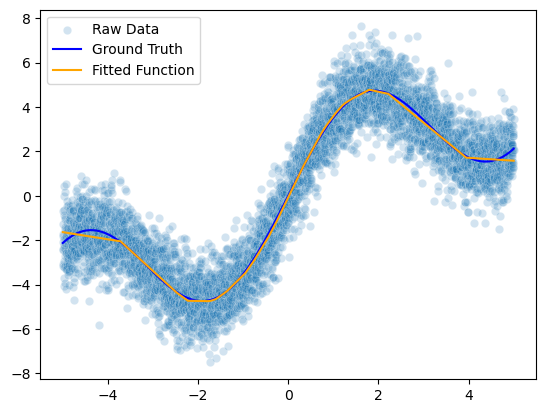

Epoch: 201, Loss: 0.9881016612052917


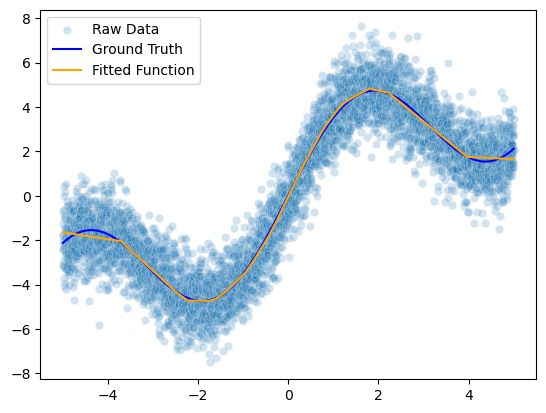

Epoch: 211, Loss: 0.9979329109191895


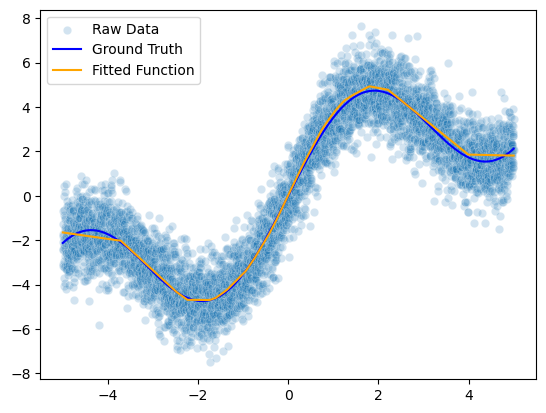

Epoch: 221, Loss: 0.9917759895324707


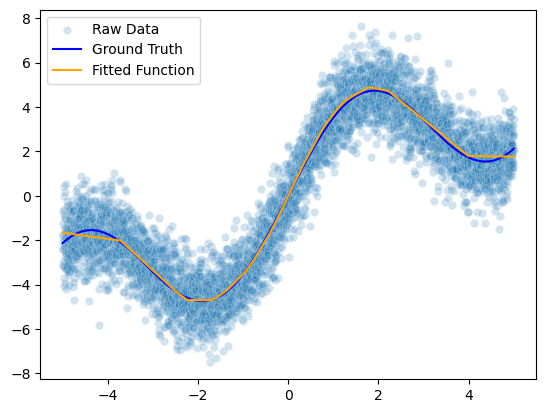

Epoch: 231, Loss: 0.9882797002792358


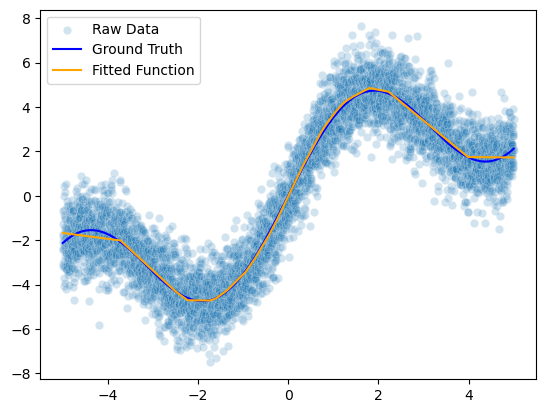

Epoch: 241, Loss: 0.9864315390586853


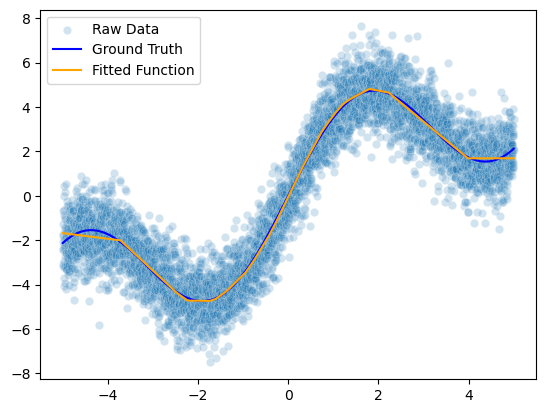

Epoch: 251, Loss: 0.9864466786384583


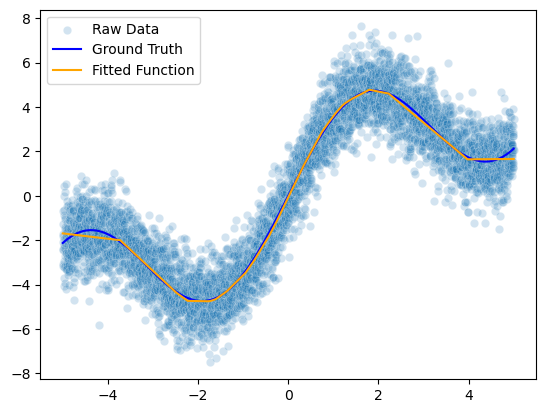

Epoch: 261, Loss: 0.9857468605041504


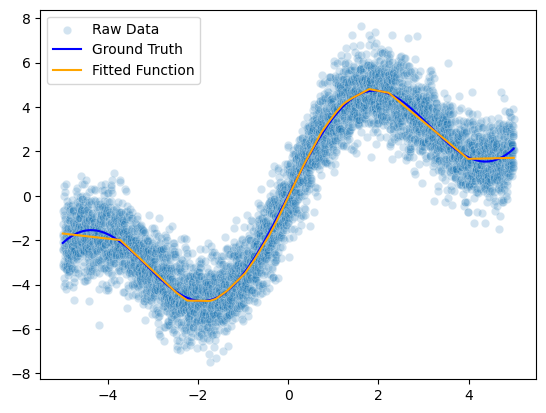

Epoch: 271, Loss: 0.9858737587928772


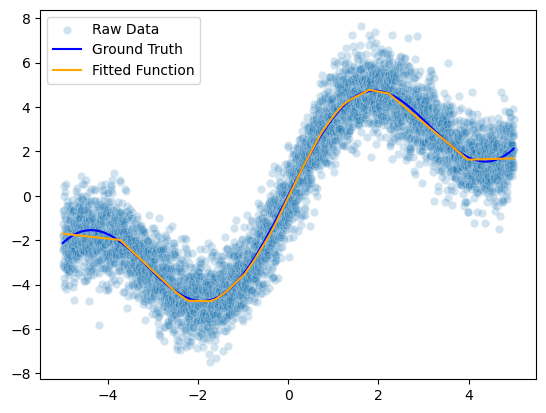

Epoch: 281, Loss: 0.9865488409996033


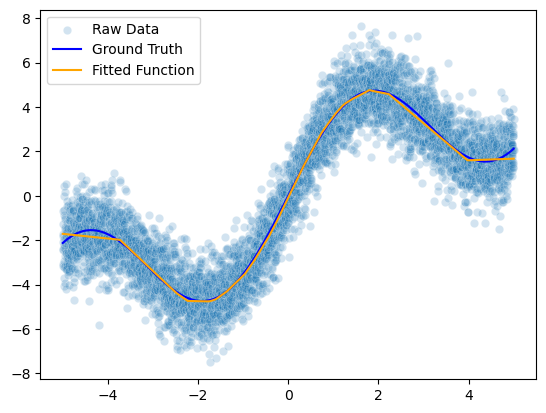

Epoch: 291, Loss: 0.9904018640518188


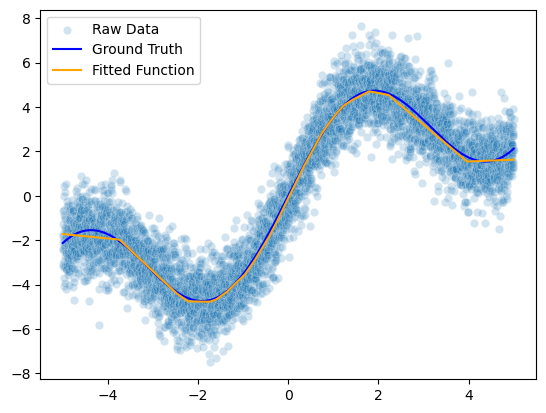

Epoch: 301, Loss: 0.9858140349388123


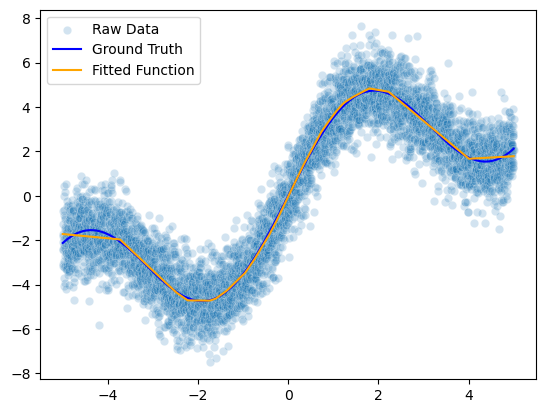

Epoch: 311, Loss: 0.9848703145980835


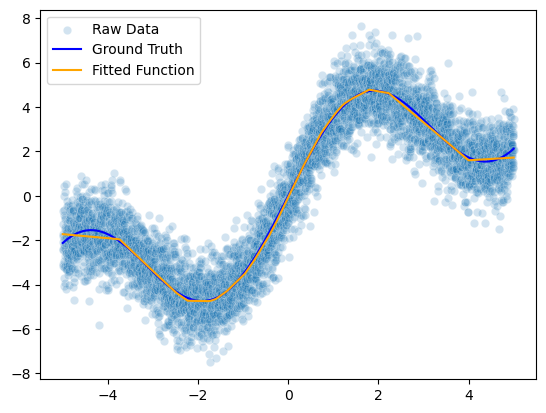

Epoch: 321, Loss: 0.9850699305534363


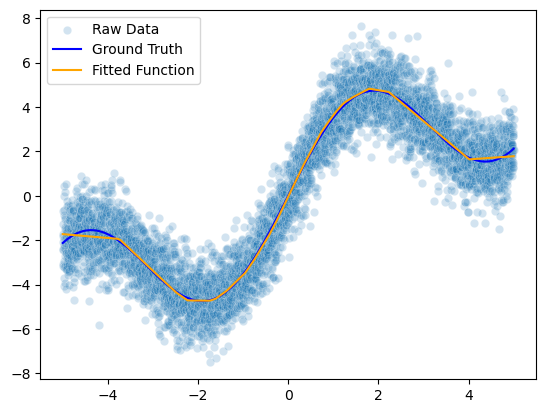

Epoch: 331, Loss: 0.9850689172744751


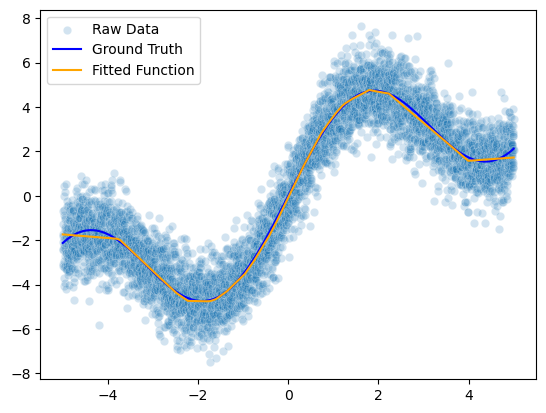

Epoch: 341, Loss: 0.9895161986351013


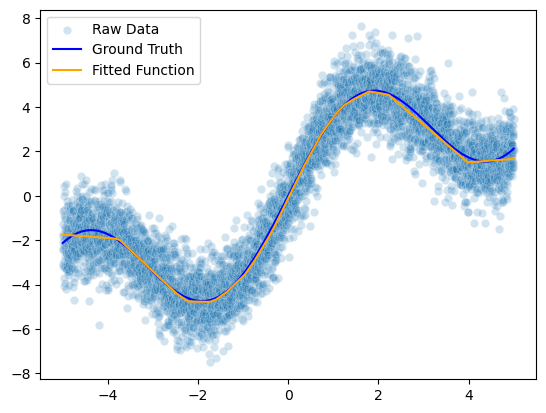

Epoch: 351, Loss: 0.9845756888389587


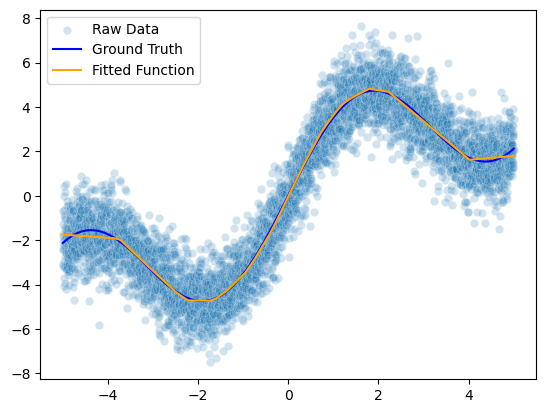

Epoch: 361, Loss: 0.9840617179870605


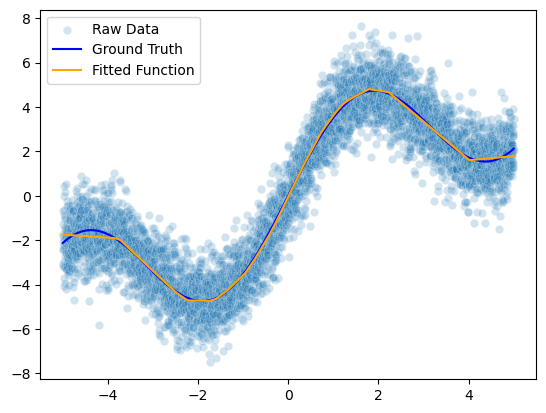

Epoch: 371, Loss: 0.9860015511512756


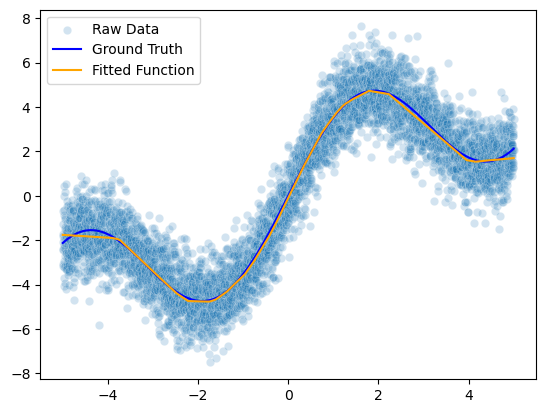

Epoch: 381, Loss: 0.9845957159996033


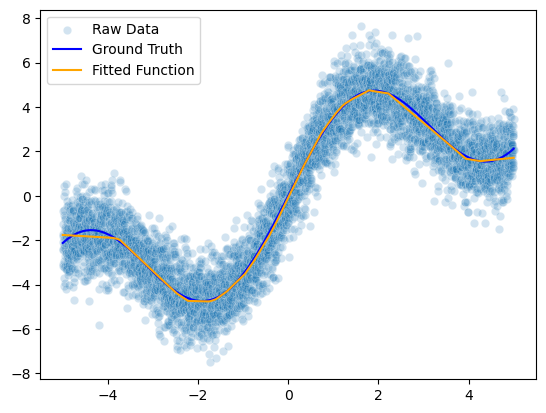

Epoch: 391, Loss: 0.9846532344818115


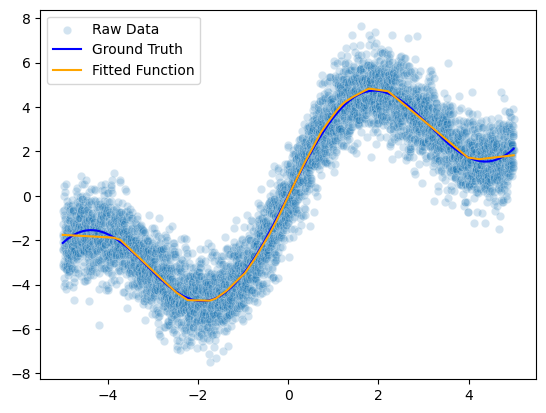

Epoch: 401, Loss: 0.989719808101654


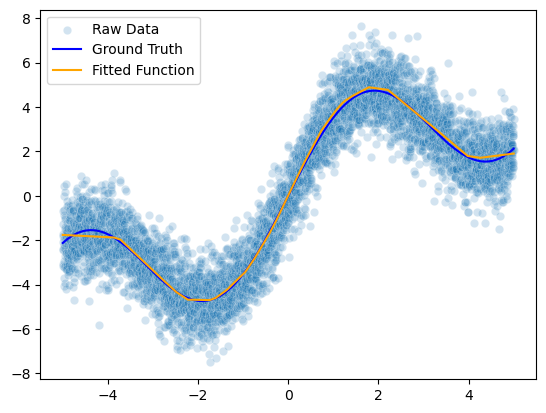

Epoch: 411, Loss: 0.9852391481399536


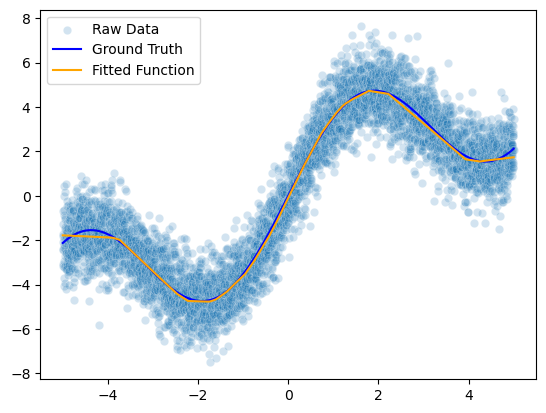

Epoch: 421, Loss: 0.9836798906326294


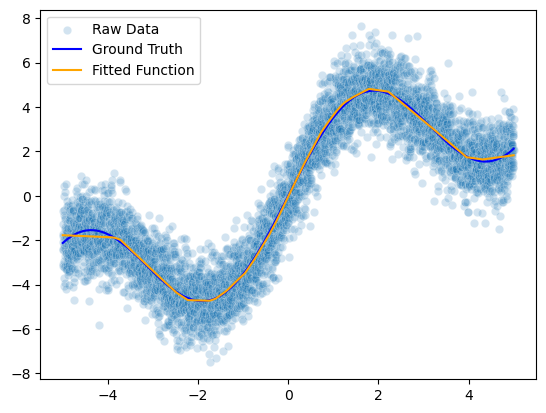

Epoch: 431, Loss: 0.9842913150787354


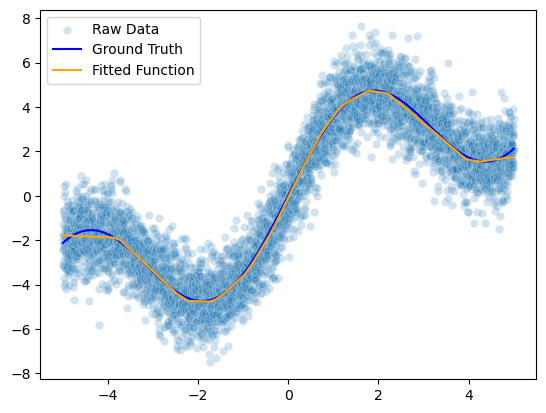

Epoch: 441, Loss: 0.9826810359954834


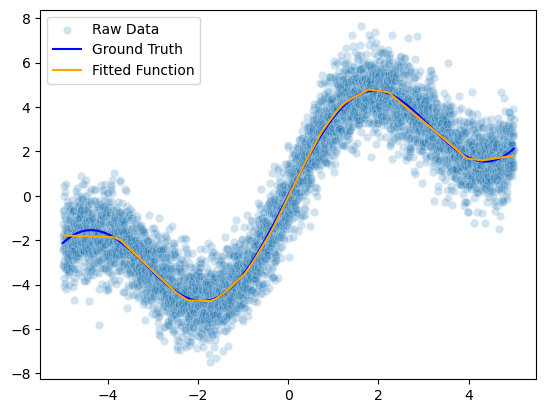

Epoch: 451, Loss: 0.9853593707084656


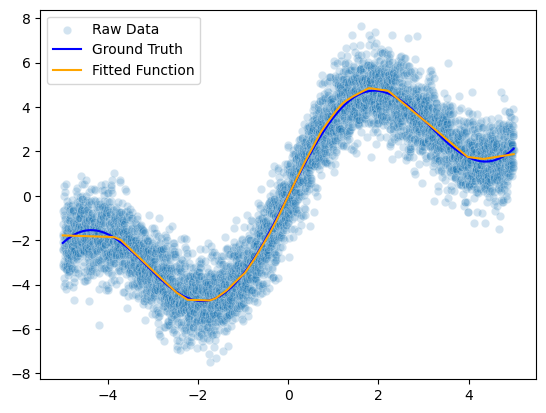

Epoch: 461, Loss: 0.9864832758903503


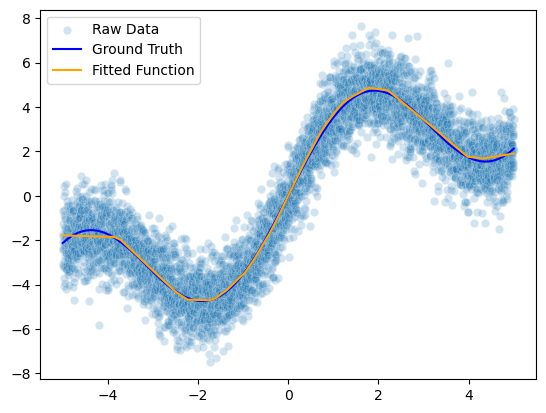

Epoch: 471, Loss: 0.9840062260627747


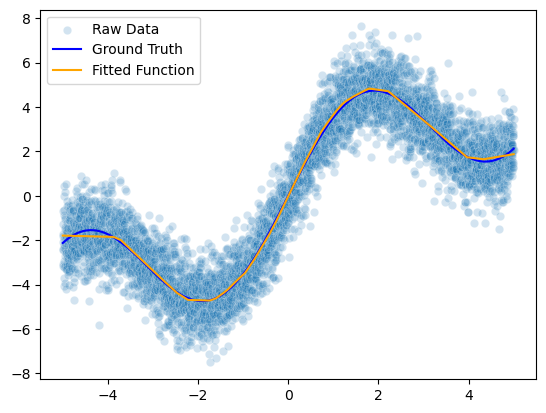

Epoch: 481, Loss: 0.9838685393333435


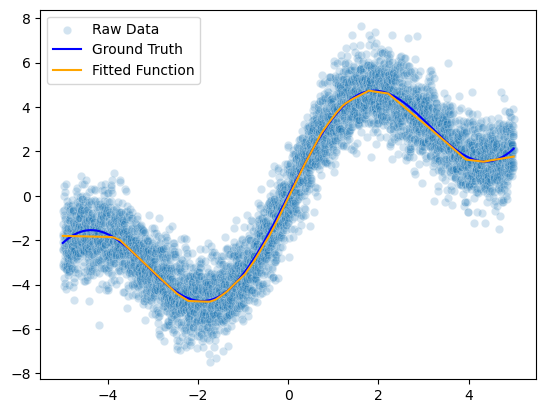

Epoch: 491, Loss: 0.9823925495147705


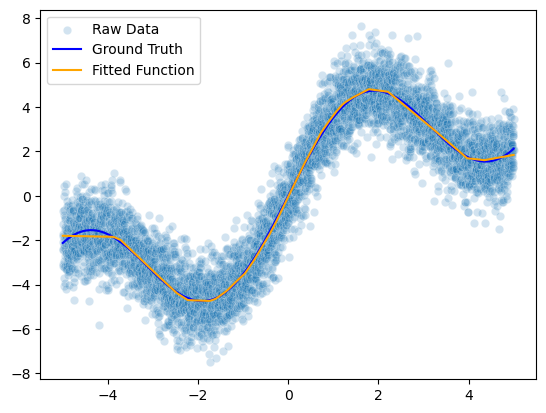

In [11]:
# Training
x_tensor = torch.tensor(x.reshape(-1, 1), dtype=torch.float32)
y_tensor = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
        y_pred = predictions.detach().numpy()
        sns.scatterplot(x=x, y=y, label='Raw Data', alpha=0.2)
        sns.lineplot(x=x, y=ground_truth, color='blue', label='Ground Truth')
        sns.lineplot(x=x, y=y_pred.squeeze(), color='orange', label='Fitted Function')
        plt.legend()
        plt.show()